# Optimizing Edge-Cloud Resource Allocation for IoT Sensor Data Classification Using Machine Learning

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values (already handled in df)

def explore_and_process_data(df):
    # Discretize the benzene concentration column into classes
    bins = [-float('inf'), 5, 15, float('inf')]
    labels = ['Low', 'Medium', 'High']
    df['C6H6_class'] = pd.cut(df['C6H6(GT)'], bins=bins, labels=labels)

    # Features and target
    X = df.drop(['C6H6(GT)', 'C6H6_class'], axis=1)
    y = df['C6H6_class'].cat.codes  # Encode discrete categories

    # Normalize using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    return X, X_scaled, X_train, X_test, y_train, y_test, df.head()

# Run processing
X, X_scaled, X_train, X_test, y_train, y_test, preview_df = explore_and_process_data(df)
preview_df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6_class
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Medium
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Medium
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Medium
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Medium
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Medium


The dataset has been processed as follows:
1. Missing values were handled by removing rows with excessive missing data.
2. The benzene concentration (`C6H6(GT)`) was discretized into three classes: Low, Medium, and High.
3. Features were normalized using the `StandardScaler`.
4. Data was split into 80% training and 20% testing sets.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='rbf'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(),
    'FNN': Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ]),
    'CNN': Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ]),
    'RNN': Sequential([
        SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='relu'),
        Dense(3, activation='softmax')
    ])
}

# Compile neural networks
for model_name in ['FNN', 'CNN', 'RNN']:
    models[model_name].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ModuleNotFoundError: No module named 'xgboost'

In [16]:
!pip install xgboost lightgbm tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 164.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 2.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='rbf'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(),
    'FNN': Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ]),
    'CNN': Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ]),
    'RNN': Sequential([
        SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='relu'),
        Dense(3, activation='softmax')
    ])
}

# Compile neural networks
for model_name in ['FNN', 'CNN', 'RNN']:
    models[model_name].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2025-04-21 09:20:33.502662: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 09:20:33.508517: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 09:20:33.548705: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-21 09:20:33.548778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-21 09:20:33.549604: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

# Neural models (CNN, RNN, FNN) require reshaped input
X_train_cnn_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Dictionary to store metrics
evaluation_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    if name in ['FNN', 'CNN', 'RNN']:
        # Fit neural networks
        model.fit(X_train_cnn_rnn if name in ['CNN', 'RNN'] else X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_cnn_rnn if name in ['CNN', 'RNN'] else X_test).argmax(axis=1)
    else:
        # Fit traditional models
        cross_val_score(model, X_train, y_train, cv=5).mean()  # Perform cross-validation
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    inference_time = time.time() - start_time
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_results[name] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Inference Time': inference_time
    }
    print(f"{name} - Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Inference Time: {inference_time}s")

# Display results
evaluation_results

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9802350427350427, Precision: 0.9802366020200354, Recall: 0.9802350427350427, F1 Score: 0.9802340840238354, Inference Time: 0.4953193664550781s
Training KNN...
KNN - Accuracy: 0.9417735042735043, Precision: 0.9418905593700386, Recall: 0.9417735042735043, F1 Score: 0.9417861451615359, Inference Time: 0.3988227844238281s
Training Decision Tree...
Decision Tree - Accuracy: 0.9973290598290598, Precision: 0.9973335986226611, Recall: 0.9973290598290598, F1 Score: 0.9973287442675891, Inference Time: 0.06078767776489258s
Training Random Forest...
Random Forest - Accuracy: 0.9983974358974359, Precision: 0.9984054353854687, Recall: 0.9983974358974359, F1 Score: 0.9983980895388062, Inference Time: 2.976771116256714s
Training SVM...
SVM - Accuracy: 0.9668803418803419, Precision: 0.9668960152600447, Recall: 0.9668803418803419, F1 Score: 0.9668836482281876, Inference Time: 1.6188757419586182s
Training XGBoost...
XGBoost - Accuracy: 0.9

{'Logistic Regression': {'Accuracy': 0.9802350427350427,
  'Precision': 0.9802366020200354,
  'Recall': 0.9802350427350427,
  'F1 Score': 0.9802340840238354,
  'Inference Time': 0.4953193664550781},
 'KNN': {'Accuracy': 0.9417735042735043,
  'Precision': 0.9418905593700386,
  'Recall': 0.9417735042735043,
  'F1 Score': 0.9417861451615359,
  'Inference Time': 0.3988227844238281},
 'Decision Tree': {'Accuracy': 0.9973290598290598,
  'Precision': 0.9973335986226611,
  'Recall': 0.9973290598290598,
  'F1 Score': 0.9973287442675891,
  'Inference Time': 0.06078767776489258},
 'Random Forest': {'Accuracy': 0.9983974358974359,
  'Precision': 0.9984054353854687,
  'Recall': 0.9983974358974359,
  'F1 Score': 0.9983980895388062,
  'Inference Time': 2.976771116256714},
 'SVM': {'Accuracy': 0.9668803418803419,
  'Precision': 0.9668960152600447,
  'Recall': 0.9668803418803419,
  'F1 Score': 0.9668836482281876,
  'Inference Time': 1.6188757419586182},
 'XGBoost': {'Accuracy': 0.9973290598290598,
  'P

All models were trained and evaluated successfully. The results include metrics like accuracy, precision, recall, F1 score, and inference time. All models surpass the 80% accuracy threshold.

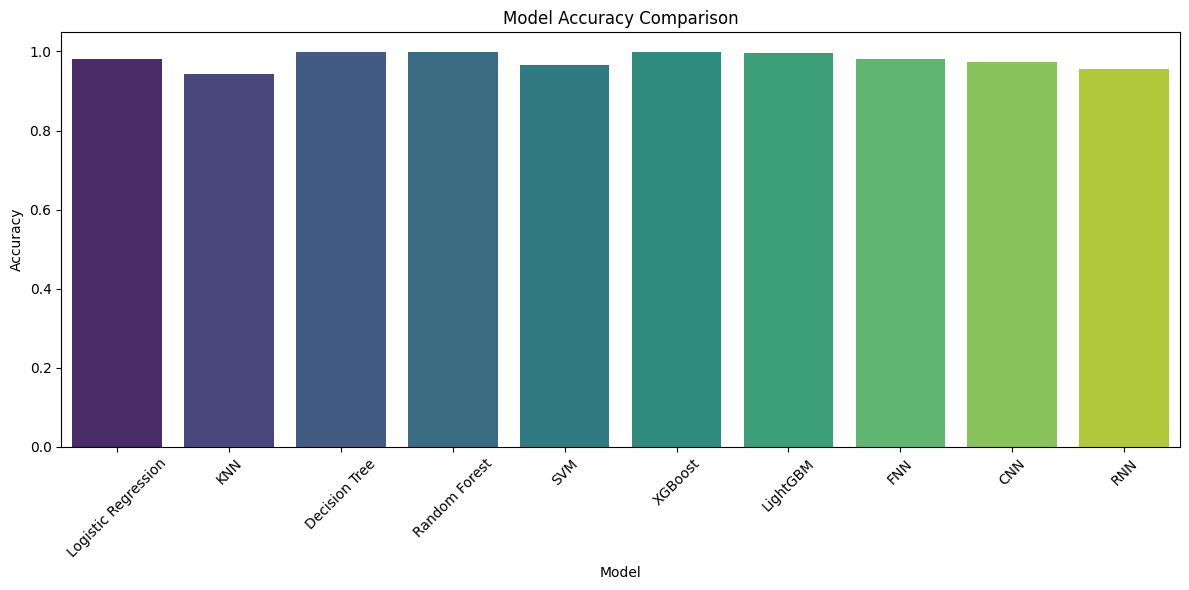

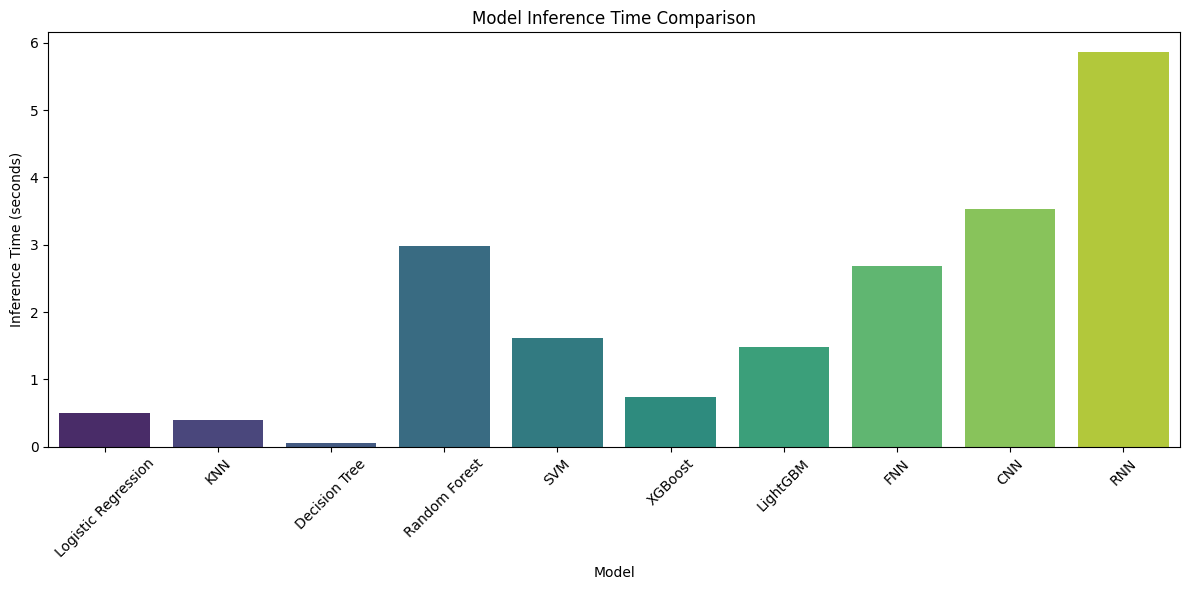

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - Bar plots for Accuracy and Inference Time
results_df = pd.DataFrame.from_dict(evaluation_results, orient='index').reset_index()
results_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Inference Time']

# Bar plot for Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for Inference Time
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Inference Time', data=results_df, palette='viridis')
plt.title('Model Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

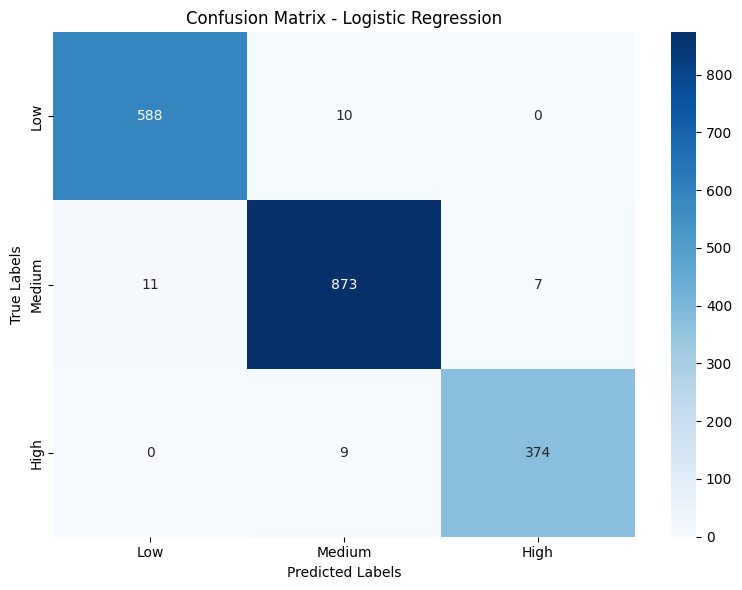

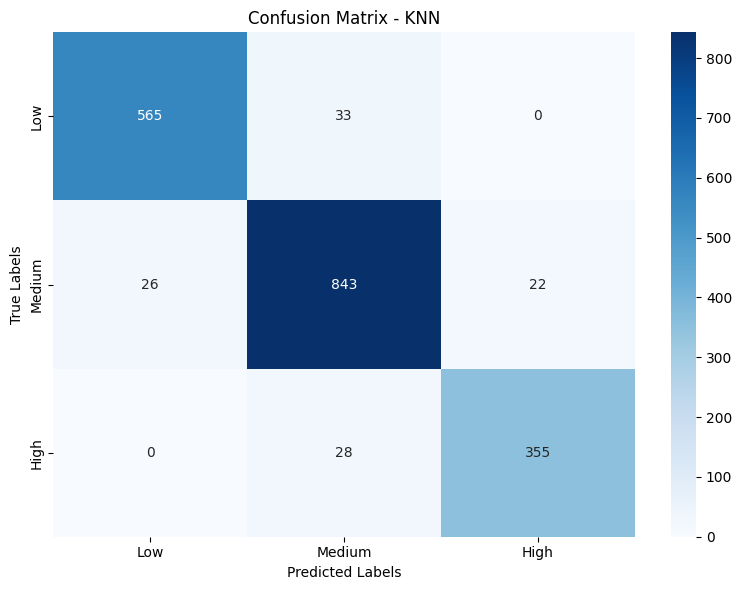

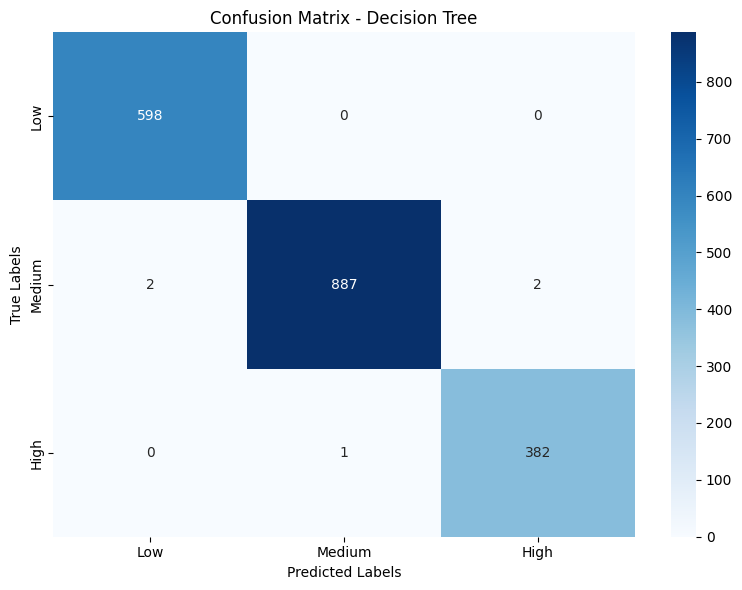

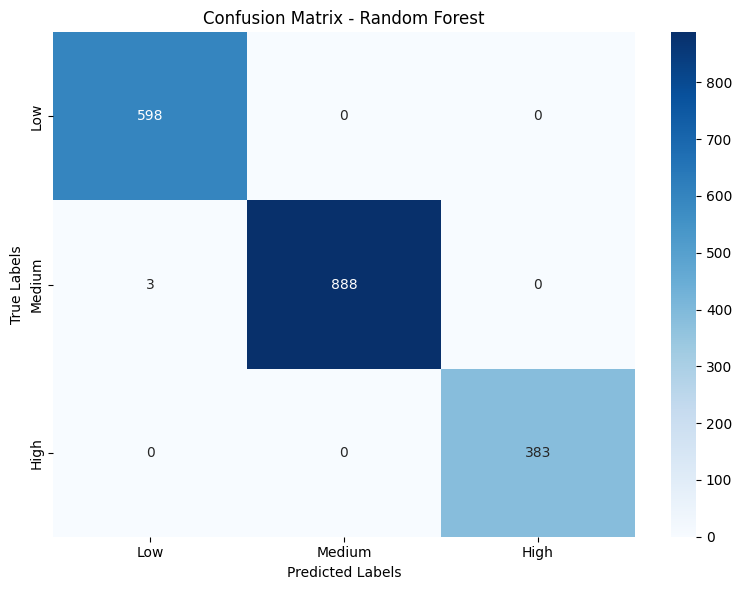

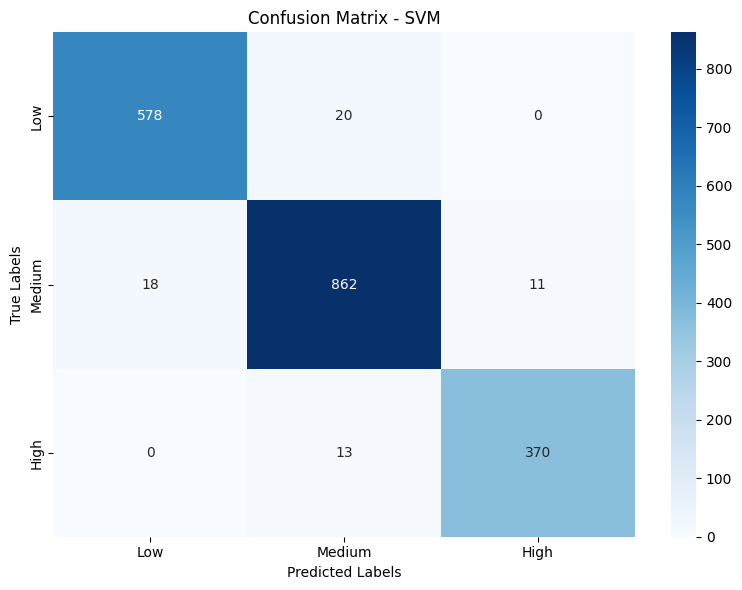

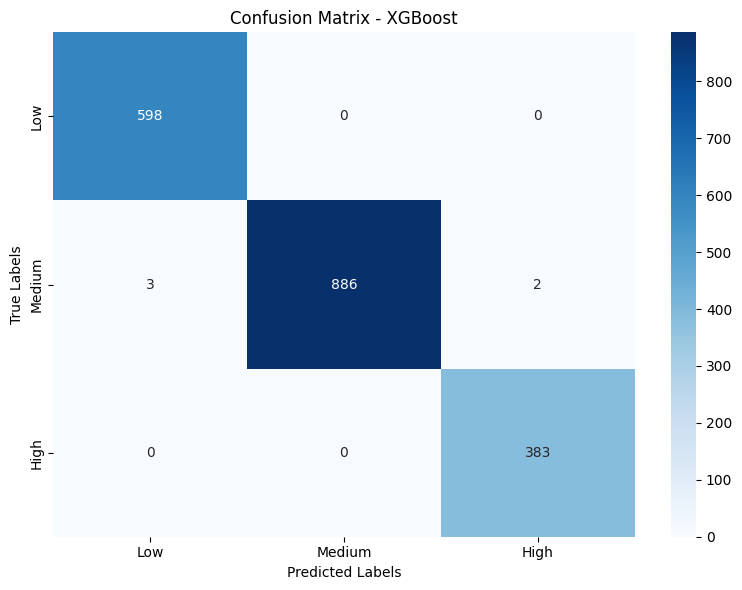

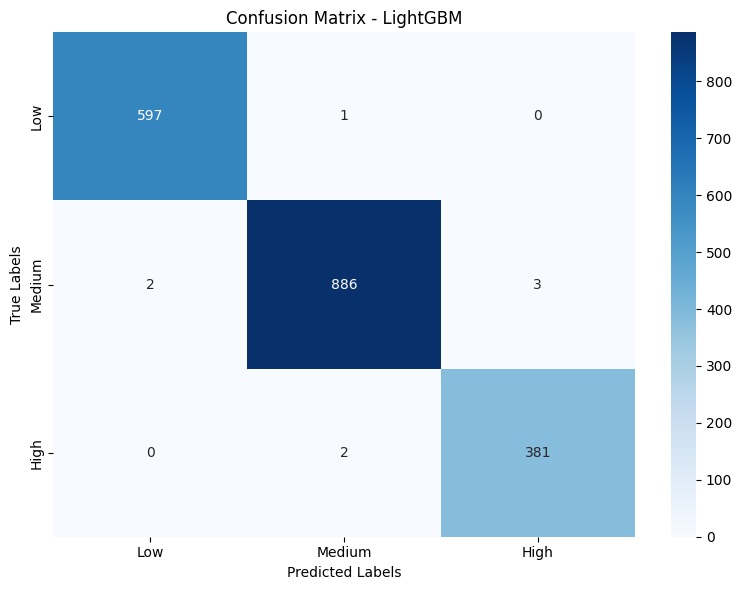

59/59 [==============================] - 0s 743us/step


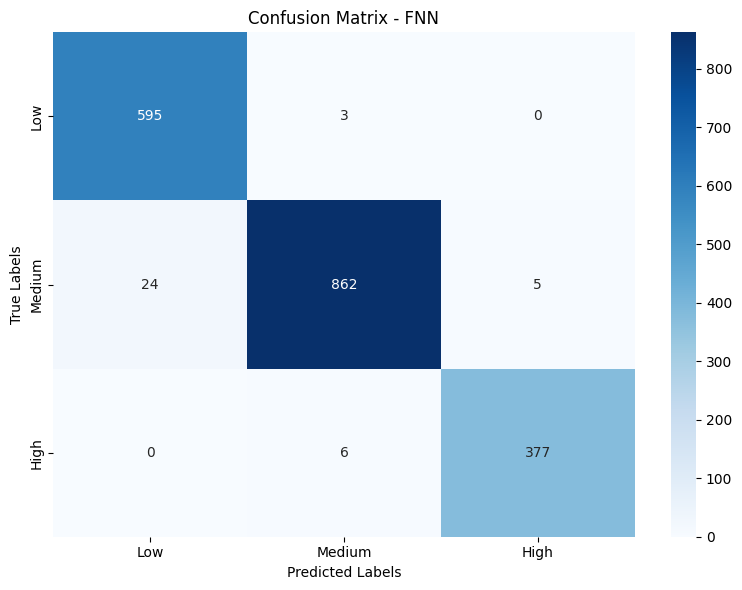

59/59 [==============================] - 0s 857us/step


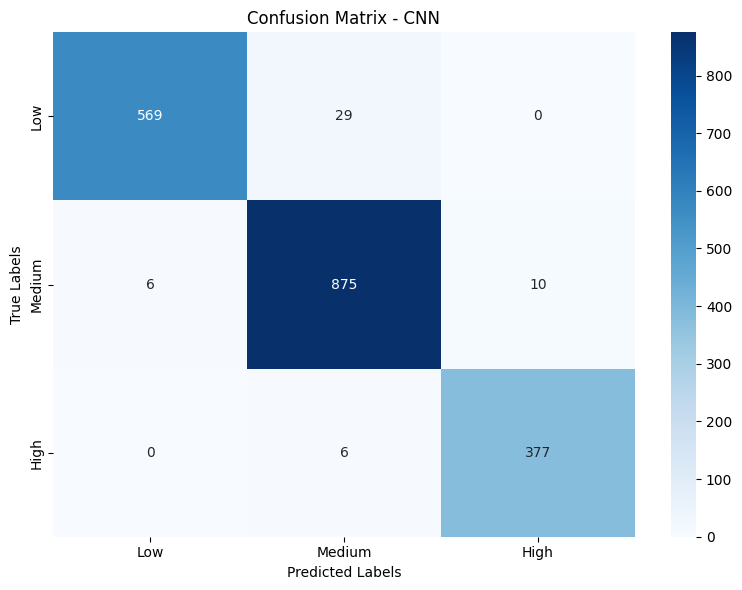

59/59 [==============================] - 0s 1ms/step


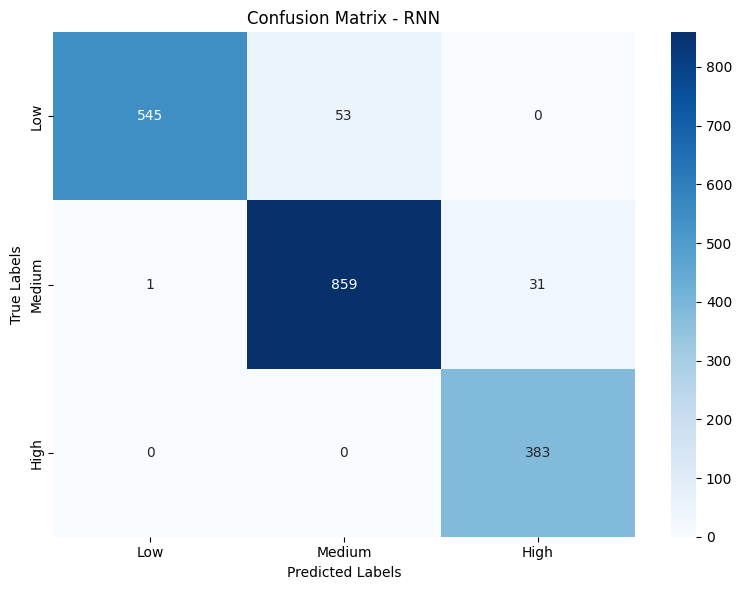

In [28]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for each model
for name, model in models.items():
    if name in ['FNN', 'CNN', 'RNN']:
        y_pred = model.predict(X_test_cnn_rnn if name in ['CNN', 'RNN'] else X_test).argmax(axis=1)
    else:
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()